In [2]:
# Import Packages
import pandas as pd
from PIL import Image
from pathlib import Path
import imagesize
import numpy as np
import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
import tensorflow
print(tensorflow.__version__)

2.2.0


# Get optimal img_width and img_height

In [1]:
# Get all folder names

import os
path = "./../../images/augmented"
dir_list = os.listdir(path)
 
print("Directories in '", path, "' :", dir_list[0:10])

Directories in ' ./../../images/augmented ' : ['Blumea_balsamifera', 'Ehretia_microphylla', 'Psidium_guajava', 'Vitex_nagundo']


In [31]:
len(dir_list)

4

In [32]:
# Src: https://medium.com/analytics-vidhya/how-to-pick-the-optimal-image-size-for-training-convolution-neural-network-65702b880f05
# Identify Image Resolutions

imgs = []
# Get the Image Resolutions
for dirname in dir_list:
    imgs_temp = [img.name for img in Path('../../images/augmented/' + dirname).iterdir() if img.suffix in [".jpg", ".png", ".gif", ".webp", ".tiff", ".psd", ".raw", ".bmp", ".heif", ".indd", ".jpeg"]]
    imgs.append(imgs_temp)

In [33]:
len(imgs)

4

In [34]:
# Obtain number of images in a folder(plant)
imgs_len_arr = [int(len(lst)) for lst in imgs ]
imgs_len_arr

[216, 192, 120, 300]

In [35]:
img_meta = {}

counter = 0
for lst in imgs:
    for f in lst:
        img_meta[str(f)] = imagesize.get('../../images/augmented/' + dir_list[counter] + '/' + f)
    print(counter)
    counter += 1

0
1
2
3


In [36]:
img_meta

{'09whjO0kn7.png': (190, 171),
 '0a7CPZODmd.png': (553, 116),
 '0iYz8UBCeo.png': (535, 296),
 '0SIlqO3sSW.png': (410, 495),
 '1Fc2yh3v4g.png': (476, 511),
 '1JWc6GvAIg.png': (703, 283),
 '1mn4pxCj2P.png': (299, 514),
 '1rAIq079UB.png': (535, 296),
 '1vgCc7DwUU.png': (255, 419),
 '2fFBwvGJlW.png': (249, 436),
 '2JTwY5ZNsw.png': (553, 116),
 '2W8sG1ZLOv.png': (332, 393),
 '30vgx5HWnm.png': (465, 482),
 '3cULhh7v8H.png': (332, 393),
 '3IfPTCm11d.png': (201, 407),
 '3SPktLGzH2.png': (535, 296),
 '4bJlZiAwfa.png': (465, 482),
 '4hTxCpLHXj.png': (190, 171),
 '4JWffp3ulr.png': (345, 697),
 '5AxWSJI3OU.png': (182, 547),
 '5GWrJr4wpV.png': (262, 564),
 '5tQzd8ufFR.png': (247, 324),
 '6AyHCuekwV.png': (347, 276),
 '6bl4cx8yfP.png': (535, 296),
 '6iEQGOKP66.png': (262, 564),
 '6lKZlkpAWr.png': (148, 248),
 '6PdDob4JVq.png': (479, 289),
 '6X4m3YK2yL.png': (186, 550),
 '7Vao6sGxlM.png': (396, 470),
 '88fjd3V77Z.png': (345, 697),
 '899H6yzDyI.png': (328, 286),
 '8iEe1qRgAF.png': (201, 407),
 '8k2Jtw

In [37]:
# Convert it to Dataframe and compute aspect ratio
img_meta_df = pd.DataFrame.from_dict([img_meta]).T.reset_index().set_axis(['FileName', 'Size'], axis='columns', inplace=False)
img_meta_df[["Width", "Height"]] = pd.DataFrame(img_meta_df["Size"].tolist(), index=img_meta_df.index)
img_meta_df["Aspect Ratio"] = round(img_meta_df["Width"] / img_meta_df["Height"], 2)

print(f'Total Nr of Images in the dataset: {len(img_meta_df)}')
img_meta_df.head()

Total Nr of Images in the dataset: 828


C:\Users\Jeremy\AppData\Local\Temp\ipykernel_26300\191186676.py:2: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  img_meta_df = pd.DataFrame.from_dict([img_meta]).T.reset_index().set_axis(['FileName', 'Size'], axis='columns', inplace=False)


,FileName,Size,Width,Height,Aspect Ratio
0,09whjO0kn7.png,"(190, 171)",190,171,1.11
1,0a7CPZODmd.png,"(553, 116)",553,116,4.77
2,0iYz8UBCeo.png,"(535, 296)",535,296,1.81
3,0SIlqO3sSW.png,"(410, 495)",410,495,0.83
4,1Fc2yh3v4g.png,"(476, 511)",476,511,0.93


In [38]:
plant_id = []

counter = 0
for i in imgs_len_arr:
    for j in range(int(i)):
        plant_id.append(dir_list[counter])
    counter += 1

plant_id

['Blumea_balsamifera',
 'Blumea_balsamifera',
 'Blumea_balsamifera',
 'Blumea_balsamifera',
 'Blumea_balsamifera',
 'Blumea_balsamifera',
 'Blumea_balsamifera',
 'Blumea_balsamifera',
 'Blumea_balsamifera',
 'Blumea_balsamifera',
 'Blumea_balsamifera',
 'Blumea_balsamifera',
 'Blumea_balsamifera',
 'Blumea_balsamifera',
 'Blumea_balsamifera',
 'Blumea_balsamifera',
 'Blumea_balsamifera',
 'Blumea_balsamifera',
 'Blumea_balsamifera',
 'Blumea_balsamifera',
 'Blumea_balsamifera',
 'Blumea_balsamifera',
 'Blumea_balsamifera',
 'Blumea_balsamifera',
 'Blumea_balsamifera',
 'Blumea_balsamifera',
 'Blumea_balsamifera',
 'Blumea_balsamifera',
 'Blumea_balsamifera',
 'Blumea_balsamifera',
 'Blumea_balsamifera',
 'Blumea_balsamifera',
 'Blumea_balsamifera',
 'Blumea_balsamifera',
 'Blumea_balsamifera',
 'Blumea_balsamifera',
 'Blumea_balsamifera',
 'Blumea_balsamifera',
 'Blumea_balsamifera',
 'Blumea_balsamifera',
 'Blumea_balsamifera',
 'Blumea_balsamifera',
 'Blumea_balsamifera',
 'Blumea_ba

In [39]:
img_meta_df.insert(0, 'plant_id', plant_id)
img_meta_df

,plant_id,FileName,Size,Width,Height,Aspect Ratio
0,Blumea_balsamifera,09whjO0kn7.png,"(190, 171)",190,171,1.11
1,Blumea_balsamifera,0a7CPZODmd.png,"(553, 116)",553,116,4.77
2,Blumea_balsamifera,0iYz8UBCeo.png,"(535, 296)",535,296,1.81
3,Blumea_balsamifera,0SIlqO3sSW.png,"(410, 495)",410,495,0.83
4,Blumea_balsamifera,1Fc2yh3v4g.png,"(476, 511)",476,511,0.93
...,...,...,...,...,...,...
823,Vitex_nagundo,ZPomgXHoXi.png,"(267, 782)",267,782,0.34
824,Vitex_nagundo,ZrDWdXfGX7.png,"(306, 251)",306,251,1.22
825,Vitex_nagundo,Zt1O7zFORV.png,"(289, 227)",289,227,1.27
826,Vitex_nagundo,zyWCIoVc3c.png,"(441, 257)",441,257,1.72


In [40]:
img_meta_df.to_csv('../../csv/imgs_metadata.csv')

Text(0, 0.5, 'Height')

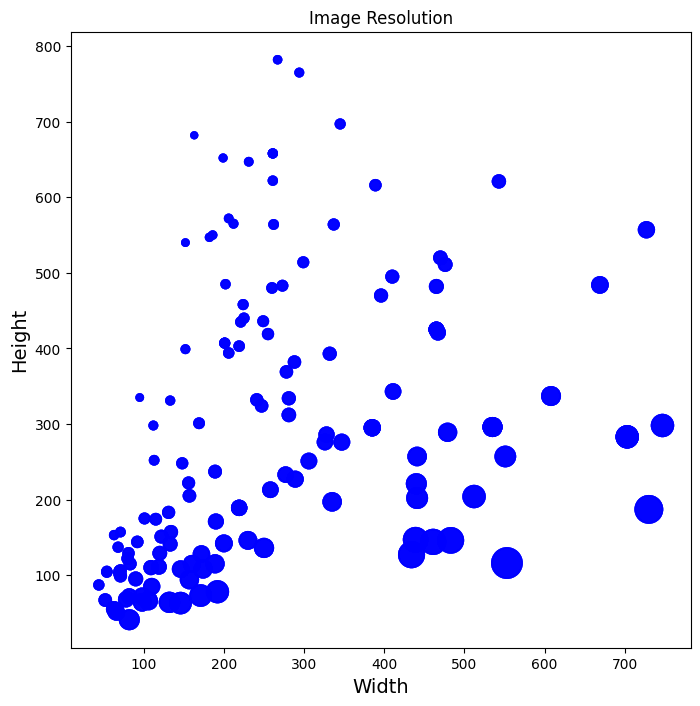

In [41]:
# Visualize Image Resolutions

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
points = ax.scatter(img_meta_df.Width, img_meta_df.Height, color='blue', alpha=0.5, s=img_meta_df["Aspect Ratio"]*100, picker=True)
ax.set_title("Image Resolution")
ax.set_xlabel("Width", size=14)
ax.set_ylabel("Height", size=14)

# Preprocessing

In [3]:
img_meta_df = pd.read_csv('../../csv/imgs_metadata.csv')

In [4]:
image_size = tuple((400, 400))
width, height = 400, 400
depth = 3

train_data_dir = r"images/augmented"

EPOCHS = 20
BATCH_SIZE = 20

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.set_visible_devices(gpus[0], 'GPU')

print(gpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [6]:
image_directory_list = []
filename_list = img_meta_df['FileName'].tolist()
corresponding_foldername_list = img_meta_df['plant_id'].tolist()

for idx,i in enumerate(filename_list):
    image_directory_list.append(f"../../images/augmented/{corresponding_foldername_list[idx]}/{i}")

image_directory_list

['images/augmented/Blumea_balsamifera/09whjO0kn7.png',
 'images/augmented/Blumea_balsamifera/0a7CPZODmd.png',
 'images/augmented/Blumea_balsamifera/0iYz8UBCeo.png',
 'images/augmented/Blumea_balsamifera/0SIlqO3sSW.png',
 'images/augmented/Blumea_balsamifera/1Fc2yh3v4g.png',
 'images/augmented/Blumea_balsamifera/1JWc6GvAIg.png',
 'images/augmented/Blumea_balsamifera/1mn4pxCj2P.png',
 'images/augmented/Blumea_balsamifera/1rAIq079UB.png',
 'images/augmented/Blumea_balsamifera/1vgCc7DwUU.png',
 'images/augmented/Blumea_balsamifera/2fFBwvGJlW.png',
 'images/augmented/Blumea_balsamifera/2JTwY5ZNsw.png',
 'images/augmented/Blumea_balsamifera/2W8sG1ZLOv.png',
 'images/augmented/Blumea_balsamifera/30vgx5HWnm.png',
 'images/augmented/Blumea_balsamifera/3cULhh7v8H.png',
 'images/augmented/Blumea_balsamifera/3IfPTCm11d.png',
 'images/augmented/Blumea_balsamifera/3SPktLGzH2.png',
 'images/augmented/Blumea_balsamifera/4bJlZiAwfa.png',
 'images/augmented/Blumea_balsamifera/4hTxCpLHXj.png',
 'images/a

In [7]:
datagen = ImageDataGenerator(zoom_range = 0.5, 
                             shear_range = 0.3, 
                             horizontal_flip = True, 
                             preprocessing_function = preprocess_input,
                             validation_split=0.2)

In [8]:
train = datagen.flow_from_directory(directory = 'images/augmented', 
                                              target_size = (400, 400), 
                                              batch_size = 32,
                                              class_mode='categorical',
                                              shuffle=True,
                                              subset='training')

test = datagen.flow_from_directory(directory = 'images/augmented', 
                                              target_size = (400, 400), 
                                              batch_size = 32,
                                              class_mode='categorical',
                                              shuffle=True,
                                              subset='validation')

Found 663 images belonging to 4 classes.
Found 165 images belonging to 4 classes.


In [9]:
t_img, label = train.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


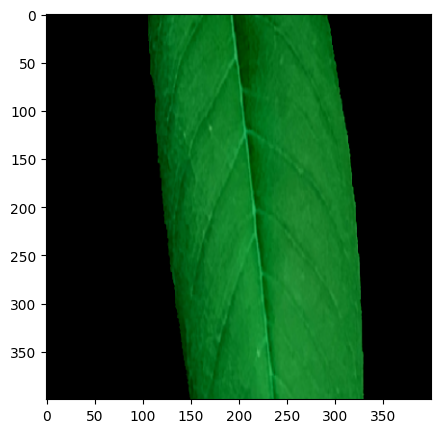

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


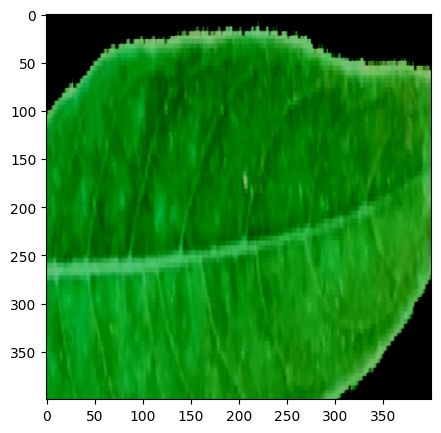

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


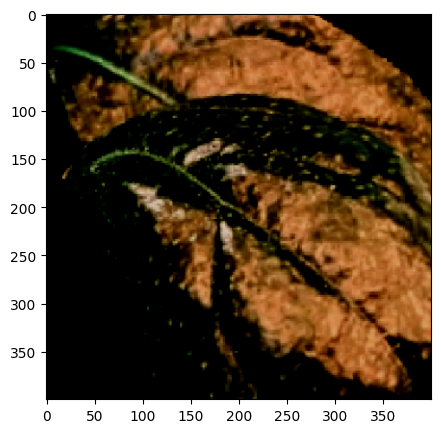

In [10]:
def plotImage(img_arr, label):
    for im,l in zip(img_arr, label):
        plt.figure(figsize = (5,5))
        plt.imshow(im/180)
        plt.show()
        
        
plotImage(t_img[:3], label[:3])

# Model

In [11]:
import h5py
base_model = VGG19(input_shape=(400,400,3), include_top = False)

In [12]:
for layer in base_model.layers:
    layer.trainable = False

In [13]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 400, 400, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 400, 400, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 400, 400, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 200, 200, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 200, 200, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 200, 200, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 100, 100, 128)     0     

In [14]:
X = Flatten()(base_model.output)
X = Dense(units = 4, activation='softmax')(X)

model = Model(base_model.input, X)

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 400, 400, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 400, 400, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 400, 400, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 200, 200, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 200, 200, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 200, 200, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 100, 100, 128)     0     

In [16]:
model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'])

# Checkpoint

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor = 'test_accuracy', min_delta=0.01, patience = 3, verbose = 1)

mc = ModelCheckpoint(filepath = '../../models/best_model.h5', 
                     monitor = 'accuracy', 
                     min_delta=0.01, 
                     patience = 3, 
                     verbose = 1, 
                     save_best_only = True)

cb = [es, mc]

In [19]:
his = model.fit(train,
                          steps_per_epoch = 10, 
                          epochs = 10, 
                          verbose = 1, 
                          callbacks = cb, 
                          validation_data = test, 
                          validation_steps = 16)


Epoch 1/10
10/10 [==============================] - ETA: 0s - loss: 1.6467 - accuracy: 0.9132WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 16 batches). You may need to use the repeat() function when building your dataset.

Epoch 00001: accuracy did not improve from 0.91562
10/10 [==============================] - 25s 3s/step - loss: 1.6467 - accuracy: 0.9132 - val_loss: 1.0094 - val_accuracy: 0.9455
Epoch 2/10
10/10 [==============================] - ETA: 0s - loss: 1.7704 - accuracy: 0.9196WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 16 batches). You may need to use the repeat() function when building your dataset.

Epoch 00002: accuracy improved from 0.91562 to 0.91961, saving model to models/best_model.h5
10/10 [

In [20]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

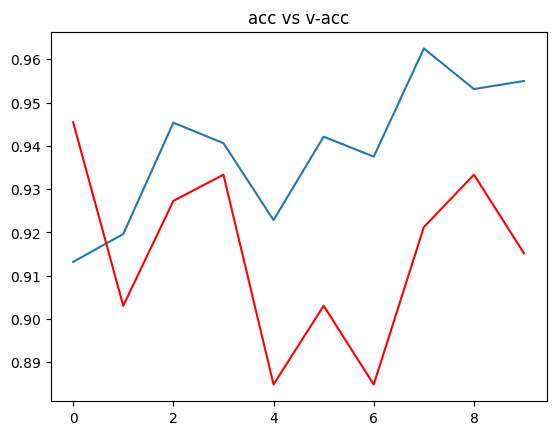

In [21]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = "red")
plt.title('acc vs v-acc')
plt.show()

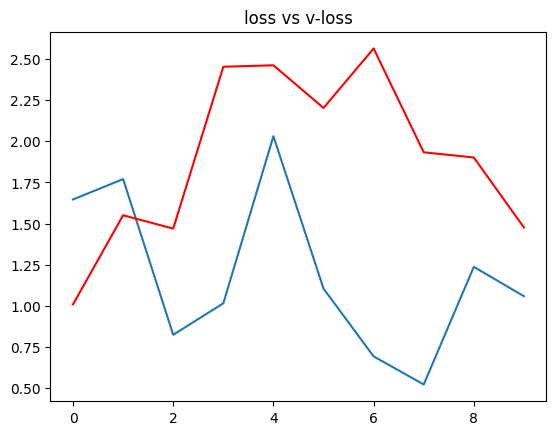

In [22]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = "red")
plt.title('loss vs v-loss')
plt.show()

In [23]:
# best model

from tensorflow.keras.models import load_model

model = load_model('../../models/best_model.h5')

In [24]:
acc = model.evaluate(test)[1]

6/6 [==============================] - 6s 1s/step - loss: 2.1818 - accuracy: 0.9091


In [25]:
def prediction(path):
    img = load_img(path, target_size=(400, 400))
    i = img_to_array(img)
    im = preprocess_input(i)
    img = np.expand_dims(im, axis = 0)
    pred = np.argmax(model.predict(img))
    print(pred)

In [42]:
path = "../../images/raws/03_28931hjd.png"

prediction(path)

2


In [28]:
train.class_indices

{'Blumea_balsamifera': 0,
 'Ehretia_microphylla': 1,
 'Psidium_guajava': 2,
 'Vitex_nagundo': 3}